In [ ]:
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
# from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from sklearn.datasets import make_blobs
# from sklearn.decomposition import PCA

# Plotting max-margin classification in 2D

x and y are switched in matplotlib

In [ ]:
data, labels = make_blobs(n_samples=10, n_features=2, shuffle=False, random_state=1, centers=2, center_box=(-5, 5))
labels[labels==0] = -1 # Switch encoding to {-1, 1}
data, labels

(array([[-1.35795171,  1.13027631],
        [ 0.03562768, -0.09829376],
        [ 0.91503181,  1.44203803],
        [-0.51074086,  1.95387456],
        [ 0.63232798,  0.14310422],
        [-5.32127346, -2.36072863],
        [-3.86508681, -3.07656554],
        [-5.17128446, -2.85453269],
        [-4.95664251, -1.39385906],
        [-6.09947543, -0.83195056]]),
 array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1]))

In [ ]:
def plot_decision_boundary(q, n, plot_distances=True, plot_centroids=True, plot_text=True, axis=None):
  assert np.isclose(norm(n), 1), "The normal vector should be a unit vector"
  assert len(q) == 2, "Data must be in 2D"
  assert len(q) == len(n), "q and n are not in the same space"
  # Set up the figure
  if axis is None:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(1, 1, 1)
  else:
    ax = axis
  # Plot the data
  ax.scatter(data[:, 1], data[:, 0], c=labels, marker='.', cmap='coolwarm', s=100, alpha=.8)
  # Plot the 'plane'
  ax.scatter(q[1], q[0], c='m', marker='o', s=100, alpha=.8, label="$\\bar q$")
  ax.plot([q[1], q[1]+n[1]], [q[0], q[0]+n[0]], 'm--', alpha=.8, label="$\\bar n$")
  ax.plot([q[1]-n[0]*5, q[1]+n[0]*5], [q[0]+n[1]*5, q[0]-n[1]*5], 'm-', alpha=.8, label="plane")
  # Plot the centroids
  if plot_centroids:
    for label in np.unique(labels):
      centroid = np.mean(data[labels==label, :], axis=0)
      ax.scatter(centroid[1], centroid[0], c='orange', marker='x', s=100, cmap='coolwarm')
  # Plot lines for margin distances
  if plot_distances:
    for i in range(data.shape[0]):
      u = data[i, :]
      margin = (u-q).dot(n)
      v = u - margin*n
      ax.plot([u[1], v[1]], [u[0], v[0]], 'r-' if np.sign(margin) > 0 else 'b-', alpha=.5)
      if plot_text:
        ax.text(np.mean([u[1], v[1]]), np.mean([u[0], v[0]]), "%.1f" % margin, c='r' if np.sign(margin) > 0 else 'b', alpha=.7)
  # Axis
  ax.set_xlabel("X (second element)")
  ax.set_ylabel("Y (first element)")
  # plt.legend()
  if axis is None:
    ax.axis('equal')
    fig.show()

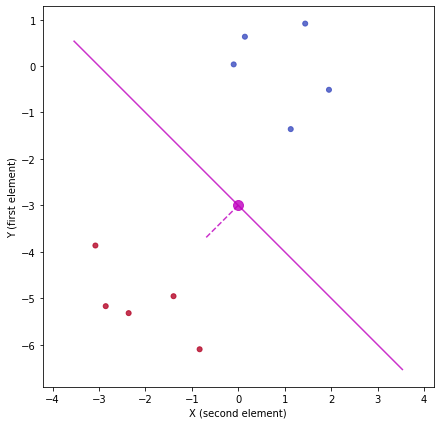

In [ ]:
q = np.asarray([-3, 0])
n = np.asarray([-1, -1])
n = n / norm(n)

plot_decision_boundary(q, n, plot_distances=False, plot_centroids=False, plot_text=False)

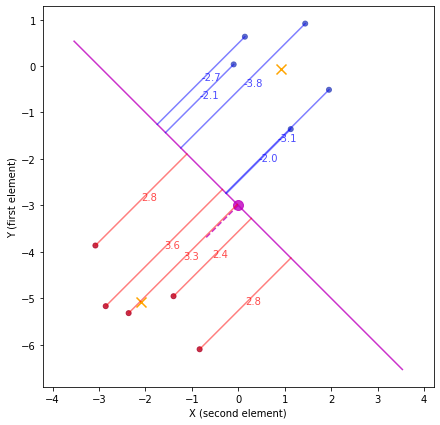

In [ ]:
q = np.asarray([-3, 0])
n = np.asarray([-1, -1])
n = n / norm(n)

plot_decision_boundary(q, n)

# Training a classifier

1.0523156489191992 [-0.67555207 -0.77846822] [-0.64438772 -0.76469893]


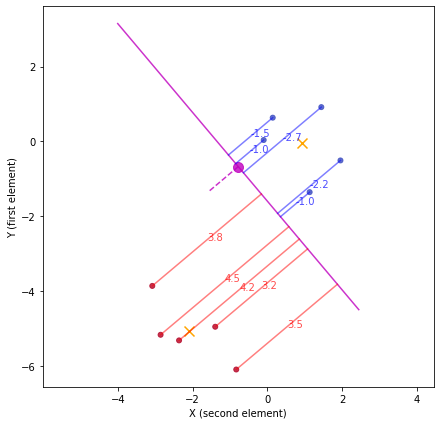

In [ ]:
def hinge_loss(q, n):
  # ret = 0
  ret = norm(q)
  for i, label in enumerate(labels):
    u = data[i, :] # Point
    p = (u-q) # Vector from q to our point
    margin = p.dot(n) # Projection on the normal vector
    ret += max(0, 1-label*margin)
  return ret

q = np.asarray([0, -5])
n = np.asarray([1, 1])
n = n / norm(n)

for i in range(200):
  q_new = q + np.random.normal(0, .1, size=q.shape)
  n_new = n + np.random.normal(0, .1, size=n.shape)
  n_new = n_new / norm(n_new)
  if hinge_loss(q_new, n_new) < hinge_loss(q, n):
    q = q_new
    n = n_new
print(hinge_loss(q, n), q, n)
# q, n
plot_decision_boundary(q, n)

Rendering animation:   0%|          | 1/250 [00:01<06:25,  1.55s/it]


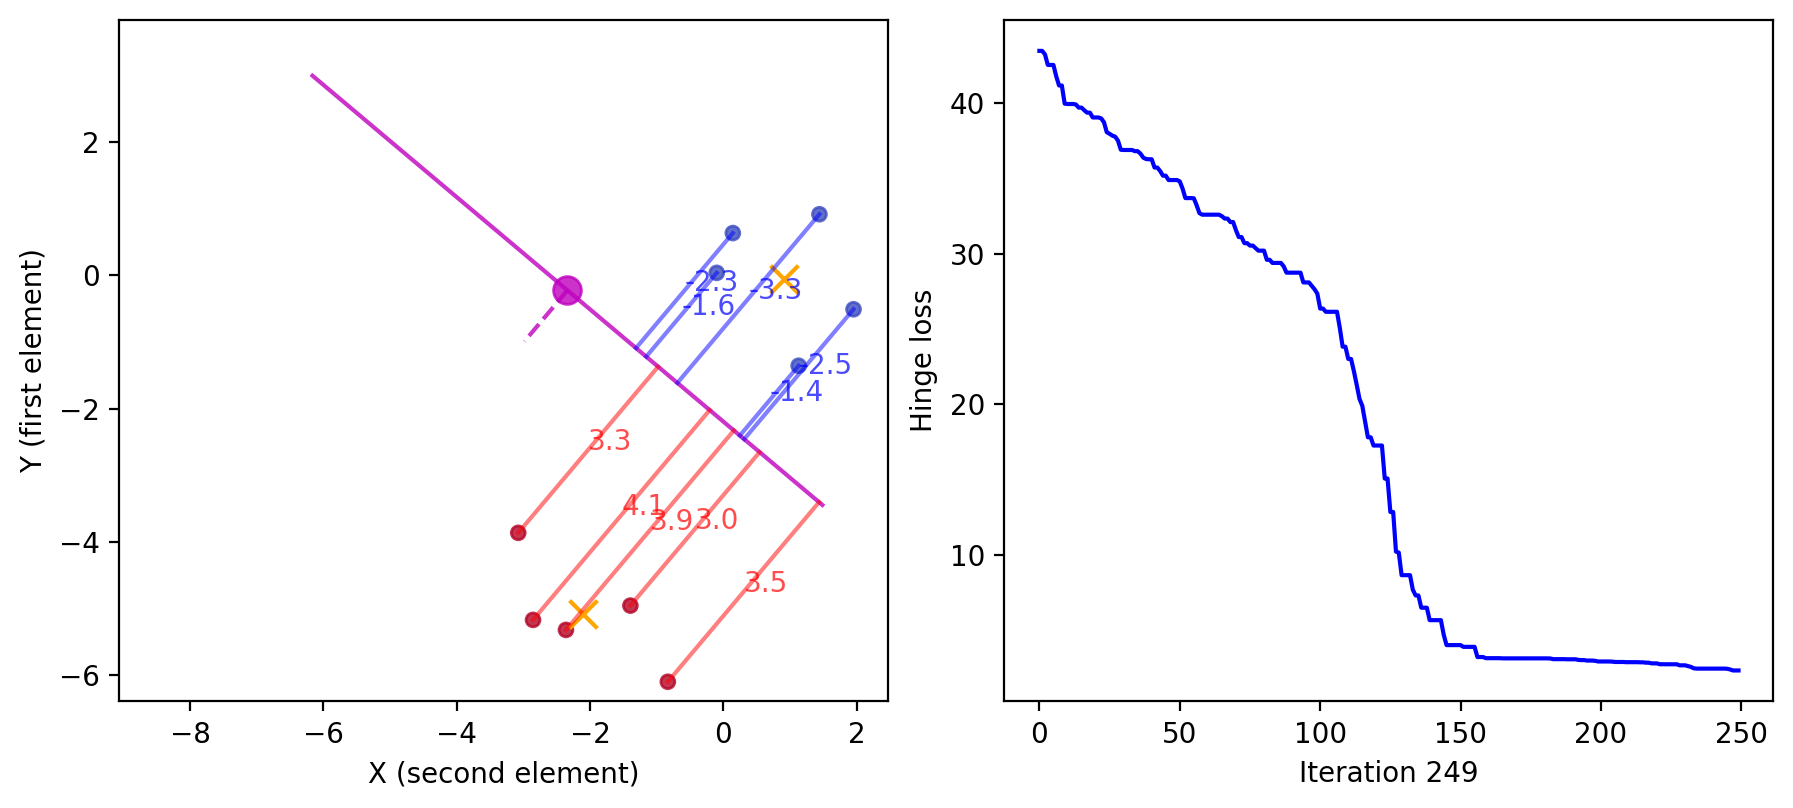

In [ ]:
n_frames = 250

# q = np.random.uniform(-10, 10, size=2)
# n = np.random.uniform(-10, 10, size=2)
q = np.asarray([0, -5])
n = np.asarray([1, 1])
n = n / norm(n)

loss = list()

fig = plt.figure(figsize=(9, 4), dpi=200)
ax = fig.subplots(1, 2)

fig.tight_layout()

def init():
  global q, n, a, pl
  plot_decision_boundary(q, n, axis=ax[0])
  ax[0].axis('equal')
  a = ax[0].axis()
  ax[1].set_xlabel("Iterations")
  return fig,

def update(frame):
  global q, n, a, pl
  q_new = q + np.random.normal(0, .05, size=q.shape)
  n_new = n + np.random.normal(0, .05, size=n.shape)
  n_new = n_new / norm(n_new)
  if hinge_loss(q_new, n_new) < hinge_loss(q, n):
    q = q_new
    n = n_new
  loss.append(hinge_loss(q, n))
  ax[0].clear()
  plot_decision_boundary(q, n, axis=ax[0])
  ax[0].axis(a)
  ax[1].clear()
  ax[1].plot(loss, 'b-')
  ax[1].set_xlabel("Iteration %i" % frame)
  ax[1].set_ylabel("Hinge loss")
  return fig,

fps = 5
anim = FuncAnimation(fig, update, 
                     frames=tqdm(range(n_frames), initial=1, position=0, 
                                 total=n_frames, desc="Rendering animation"), 
                     interval=1000/fps, init_func=init, blit=True)
anim = FuncAnimation(fig, update, frames=range(n_frames), interval=1000/fps, init_func=init, blit=True)
anim.save('training.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
# HTML(anim.to_html5_video())
# anim.save('filename.gif', writer='ffmpeg')